# Importing Libraries

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

In [ ]:
BASE_URL = "https://www.timeanddate.com"
CITY_LIST_URL = BASE_URL + "/weather/"

all_data = []

# Step 1: Scrape city directory (first 100 links/pages)

In [ ]:
response = requests.get(CITY_LIST_URL)
soup = BeautifulSoup(response.text, "html.parser")

In [ ]:
response

<Response [200]>

# Collect city links

In [ ]:
city_links = [BASE_URL + a["href"] for a in soup.select("table.zebra td a") if "/weather/" in a["href"]]
city_links = city_links[:100]  # only take first 100 pages

print(f"Found {len(city_links)} city links")

Found 100 city links


# Step 2: Scrape each city page

In [ ]:
for link in city_links:
    try:
        r = requests.get(link)
        s = BeautifulSoup(r.text, "html.parser")

        city = r.url.split("/")[-1].capitalize()
        country = r.url.split("/")[-2].capitalize()

        temp_tag = s.select_one(".h2")
        condition_tag = s.select_one(".bk-focus__qlook p")

        temp = temp_tag.get_text(strip=True) if temp_tag else "N/A"
        condition = condition_tag.get_text(strip=True).split("\n")[0] if condition_tag else "N/A"

        all_data.append([city, country, temp, condition])
        print(f"Scraped {city}, {country}, {temp}, {condition}")

        time.sleep(1)  # be nice to server
    except Exception as e:
        print(f"Error scraping {link}: {e}")

Scraped Accra, Ghana, 26 °C, Passing clouds.
Scraped Kuala-lumpur, Malaysia, 29 °C, Passing clouds.
Scraped Addis-ababa, Ethiopia, 17 °C, Passing clouds.
Scraped Kuwait-city, Kuwait, 43 °C, Sunny.
Scraped Adelaide, Australia, 12 °C, Quite cool.
Scraped Kyiv, Ukraine, 22 °C, Passing clouds.
Scraped Algiers, Algeria, 30 °C, Partly sunny.
Scraped La-paz, Bolivia, 9 °C, Partly sunny.
Scraped Almaty, Kazakstan, 25 °C, Partly cloudy.
Scraped Lagos, Nigeria, 28 °C, Scattered clouds.
Scraped Amman, Jordan, 24 °C, Clear.
Scraped Lahore, Pakistan, 28 °C, Mostly cloudy.
Scraped Amsterdam, Netherlands, 26 °C, Sunny.
Scraped Las-vegas, Usa, 28 °C, Sunny.
Scraped Anadyr, Russia, 8 °C, Passing clouds.
Scraped Lima, Peru, 17 °C, Overcast.
Scraped Anchorage, Usa, 13 °C, Overcast.
Scraped Lisbon, Portugal, 24 °C, Scattered clouds.
Scraped Ankara, Turkey, 21 °C, Passing clouds.
Scraped London, Uk, 22 °C, Broken clouds.
Scraped Antananarivo, Madagascar, 14 °C, Passing clouds.
Scraped Los-angeles, Usa, 24 

# Step 3: Save results in DataFrame

In [ ]:
df = pd.DataFrame(all_data, columns=["City", "Country", "Temperature", "Condition"])
df.to_csv("weather_100pages.csv", index=False, encoding="utf-8")

print(f"✅ Completed scraping {len(df)} records from 100 pages.")
print(df.head())

✅ Completed scraping 100 records from 100 pages.
           City    Country Temperature        Condition
0         Accra      Ghana       26 °C  Passing clouds.
1  Kuala-lumpur   Malaysia       29 °C  Passing clouds.
2   Addis-ababa   Ethiopia       17 °C  Passing clouds.
3   Kuwait-city     Kuwait       43 °C           Sunny.
4      Adelaide  Australia       12 °C      Quite cool.


In [ ]:
import pandas as pd

# Load scraped data

In [ ]:
df = pd.read_csv("weather_100pages.csv")
df

,City,Country,Temperature,Condition
0,Accra,Ghana,26 °C,Passing clouds.
1,Kuala-lumpur,Malaysia,29 °C,Passing clouds.
2,Addis-ababa,Ethiopia,17 °C,Passing clouds.
3,Kuwait-city,Kuwait,43 °C,Sunny.
4,Adelaide,Australia,12 °C,Quite cool.
...,...,...,...,...
95,Seoul,South-korea,21 °C,Clear.
96,Frankfurt,Germany,25 °C,Sunny.
97,Shanghai,China,29 °C,Clear.
98,Guatemala,Guatemala,24 °C,Scattered clouds.


In [ ]:
print(df.head())

           City    Country Temperature        Condition
0         Accra      Ghana       26 °C  Passing clouds.
1  Kuala-lumpur   Malaysia       29 °C  Passing clouds.
2   Addis-ababa   Ethiopia       17 °C  Passing clouds.
3   Kuwait-city     Kuwait       43 °C           Sunny.
4      Adelaide  Australia       12 °C      Quite cool.


In [ ]:
print(df.tail())

         City      Country Temperature          Condition
95      Seoul  South-korea       21 °C             Clear.
96  Frankfurt      Germany       25 °C             Sunny.
97   Shanghai        China       29 °C             Clear.
98  Guatemala    Guatemala       24 °C  Scattered clouds.
99  Singapore    Singapore       26 °C    Passing clouds.


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   City         100 non-null    object
 1   Country      100 non-null    object
 2   Temperature  100 non-null    object
 3   Condition    100 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB
None


In [ ]:
print(df.describe(include="all"))

         City Country Temperature        Condition
count     100     100         100              100
unique    100      67          28               25
top     Accra     Usa       28 °C  Passing clouds.
freq        1      18           8               26


In [ ]:
print(df.isnull().sum())

City           0
Country        0
Temperature    0
Condition      0
dtype: int64


# ---------- Data Cleaning ----------
## Remove °C and convert temperature to numeric

In [ ]:
df["Temperature_C"] = df["Temperature"].str.replace("°C", "").str.strip()
df["Temperature_C"] = pd.to_numeric(df["Temperature_C"], errors="coerce")

# ---------- GroupBy ----------

In [ ]:
avg_temp_country = df.groupby("Country")["Temperature_C"].mean().sort_values(ascending=False)
print("\nAverage Temperature by Country:")
print(avg_temp_country)


Average Temperature by Country:
Country
Kuwait                  43.0
Qatar                   40.0
Saudi-arabia            37.0
United-arab-emirates    35.0
Dominican-republic      32.0
                        ... 
Colombia                13.0
Iceland                  9.0
Bolivia                  9.0
Chile                    9.0
New-zealand              7.0
Name: Temperature_C, Length: 67, dtype: float64


# ---------- Pivot Table ----------

In [ ]:
pivot = pd.pivot_table(df,
                       index="Country",
                       columns="Condition",
                       values="City",
                       aggfunc="count",
                       fill_value=0)

In [ ]:
print("\nPivot Table: Countries vs Weather Conditions")
print(pivot)


Pivot Table: Countries vs Weather Conditions
Condition             Broken clouds.  Clear.  Cloudy.  \
Country                                                 
Algeria                            0       0        0   
Argentina                          0       0        0   
Australia                          0       3        0   
Bahamas                            0       0        0   
Bangladesh                         0       0        0   
...                              ...     ...      ...   
Ukraine                            0       0        0   
United-arab-emirates               0       0        0   
Uruguay                            0       0        0   
Usa                                3       0        1   
Venezuela                          0       0        0   

Condition             Drizzle. Broken clouds.  Drizzle. More clouds than sun.  \
Country                                                                         
Algeria                                     0     

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load data
df = pd.read_csv("weather_100pages.csv")

# Clean temperature column
df["Temperature_C"] = df["Temperature"].str.replace("°C", "").str.strip()
df["Temperature_C"] = pd.to_numeric(df["Temperature_C"], errors="coerce")

# ---------------- Visualizations ---------------- #

## 1. Histogram of Temperatures

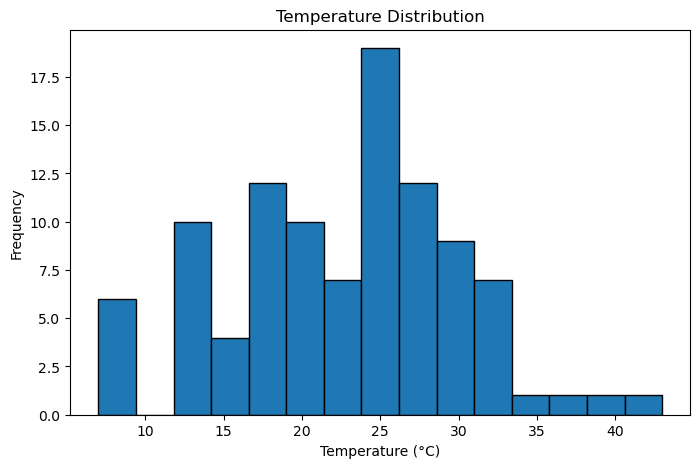

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df["Temperature_C"].dropna(), bins=15, edgecolor="black")
plt.title("Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

# 2. Boxplot of Temperature by Country

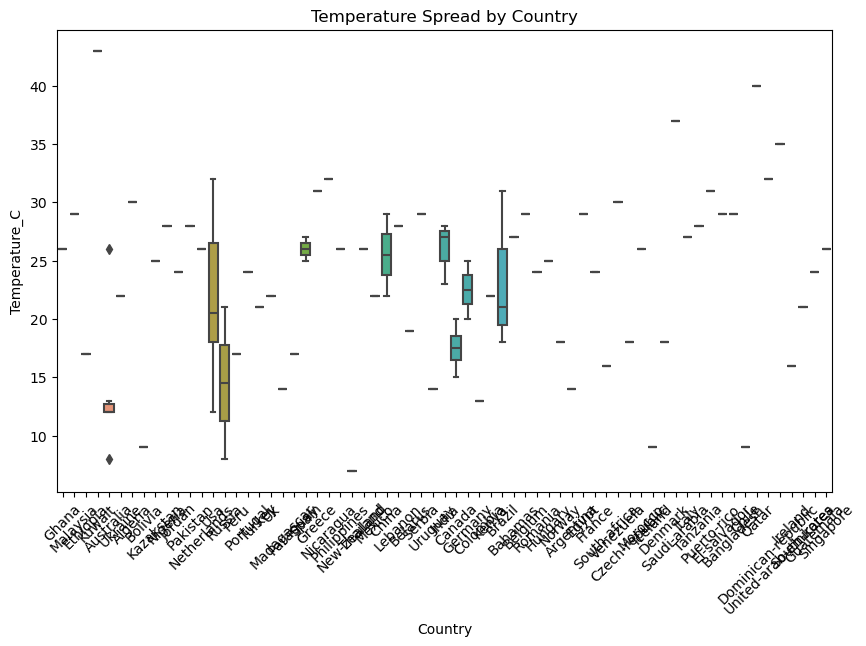

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Country", y="Temperature_C", data=df)
plt.title("Temperature Spread by Country")
plt.xticks(rotation=45)
plt.show()

# 3. Bar Plot of Average Temperature by Country

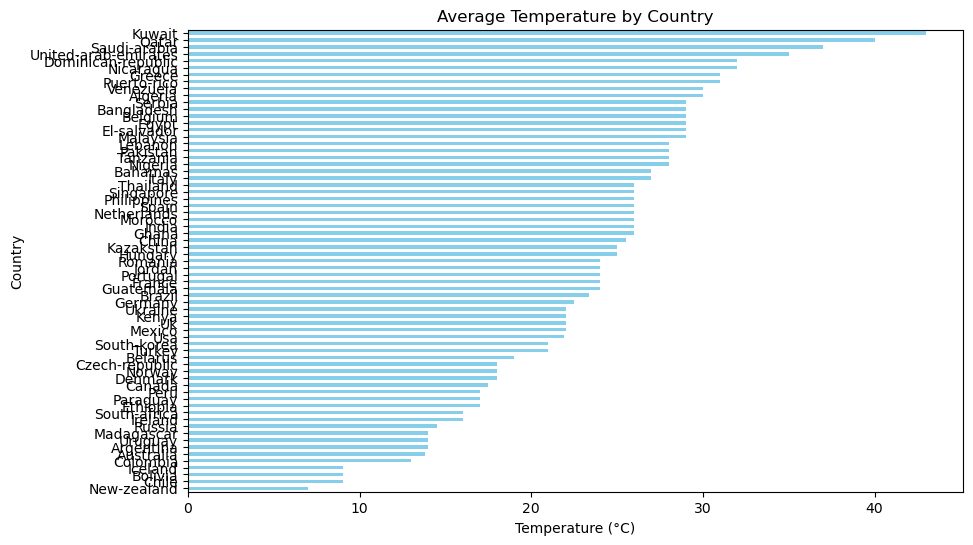

In [ ]:
avg_temp = df.groupby("Country")["Temperature_C"].mean().sort_values()
avg_temp.plot(kind="barh", figsize=(10,6), color="skyblue")
plt.title("Average Temperature by Country")
plt.xlabel("Temperature (°C)")
plt.show()

# 4. Countplot of Weather Conditions

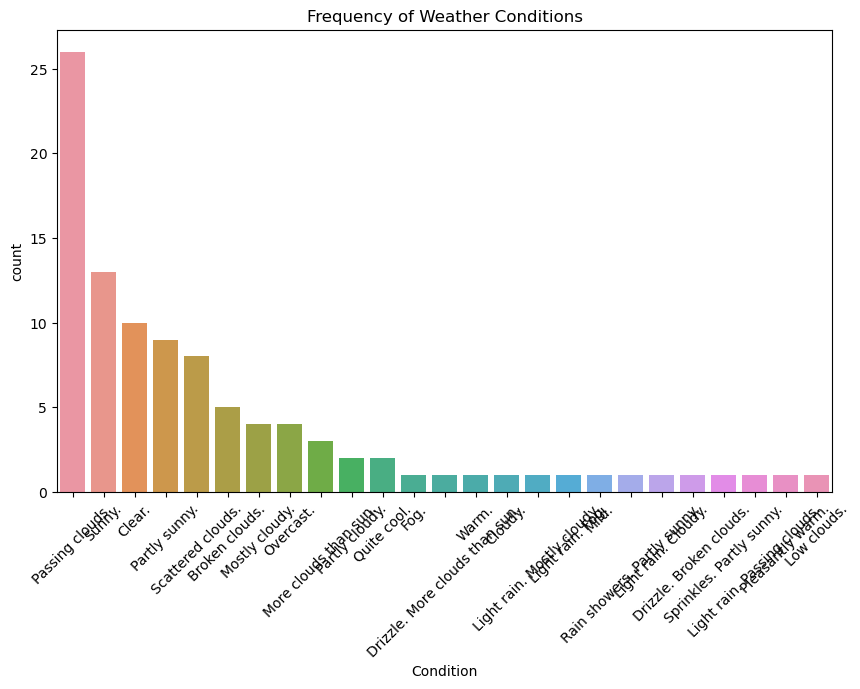

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="Condition", data=df, order=df["Condition"].value_counts().index)
plt.title("Frequency of Weather Conditions")
plt.xticks(rotation=45)
plt.show()

# 5. Pivot Table Heatmap (Country vs Condition)

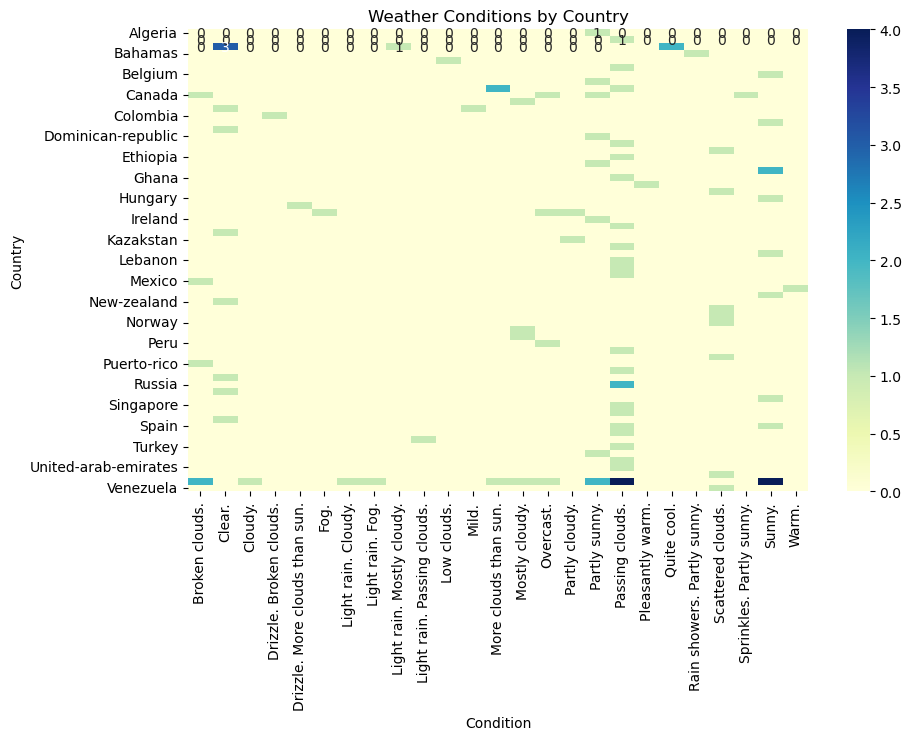

In [ ]:
pivot = pd.pivot_table(df, index="Country", columns="Condition", values="City", aggfunc="count", fill_value=0)
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Weather Conditions by Country")
plt.show()

# 6. Scatter Plot (Temperature vs City Index)

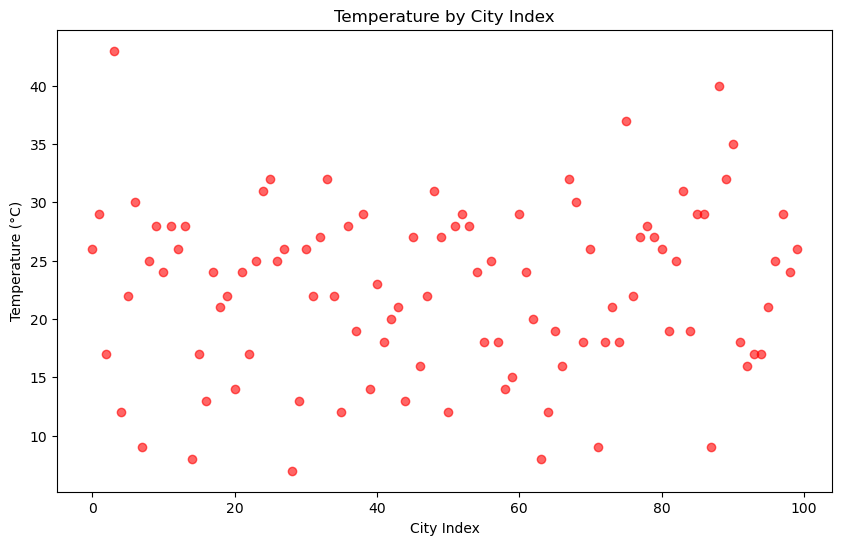

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(range(len(df)), df["Temperature_C"], c="red", alpha=0.6)
plt.title("Temperature by City Index")
plt.xlabel("City Index")
plt.ylabel("Temperature (°C)")
plt.show()

# 7. Top 10 Hottest Cities Bar Plot

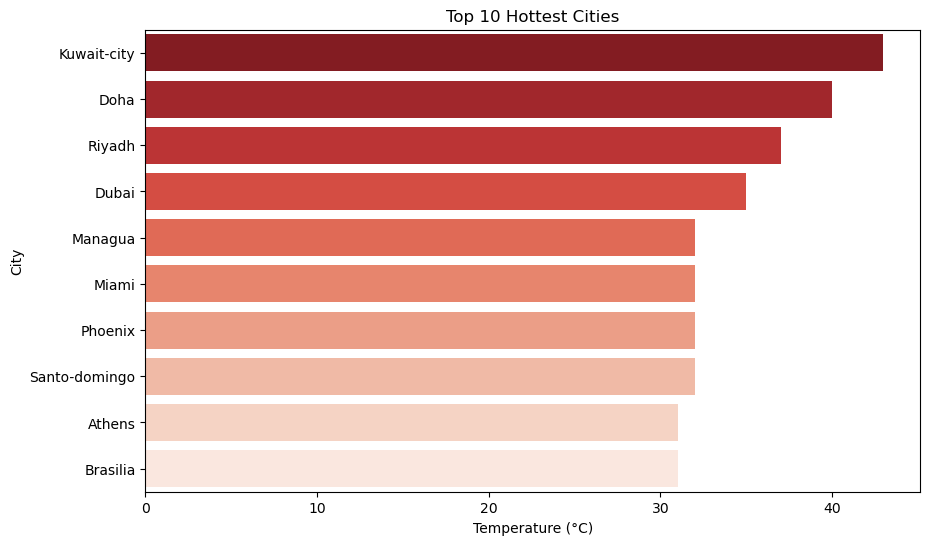

In [ ]:
top10 = df.nlargest(10, "Temperature_C")[["City", "Temperature_C"]]
plt.figure(figsize=(10,6))
sns.barplot(x="Temperature_C", y="City", data=top10, palette="Reds_r")
plt.title("Top 10 Hottest Cities")
plt.xlabel("Temperature (°C)")
plt.show()

## Univariate Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the first few rows
df.head()

# Univariate Analysis - Histograms
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Univariate Analysis - Boxplots
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


## Bivariate Analysis

In [ ]:
# Pairplot for numeric variables
sns.pairplot(df.select_dtypes(include=['int64', 'float64']))
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Example: Scatterplots for key weather relationships
if 'Temperature' in df.columns and 'Humidity' in df.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x='Temperature', y='Humidity', data=df)
    plt.title("Temperature vs Humidity")
    plt.show()

if 'WindSpeed' in df.columns and 'Pressure' in df.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x='WindSpeed', y='Pressure', data=df)
    plt.title("Wind Speed vs Pressure")
    plt.show()
